In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ReliefF import ReliefF
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import seaborn as sns


Using TensorFlow backend.


In [3]:
dataset = pd.read_csv('../output/df_general.csv', sep=',')
split_range = 0.8
del dataset['tcp_flag_cwr']
del dataset['tcp_flag_ecn']
del dataset['tcp_flag_urg']
del dataset['capture']
del dataset['delay']
del dataset['No.']
del dataset['Time']
del dataset['Protocol']

print(dataset.columns)


Index(['∆t', 'pkt_len', 'ip_len', 'tcp_hea_len', 'tcp_flag_ack',
       'tcp_flag_psh', 'tcp_flag_rst', 'tcp_flag_syn', 'tcp_flag_fin',
       'tcp_win_si2', 'prebuffering', 'stalling_event'],
      dtype='object')


In [4]:
X = dataset.iloc[:,1:-1]
X =X.fillna(X.mean())
y = dataset.iloc[:,-1]
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

          Specs         Score
8   tcp_win_si2  2.159893e+07
1        ip_len  1.923492e+04
0       pkt_len  1.878358e+04
9  prebuffering  1.857484e+04
5  tcp_flag_rst  2.039457e+03
6  tcp_flag_syn  6.919306e+02
2   tcp_hea_len  3.614096e+02
4  tcp_flag_psh  1.660304e+02
7  tcp_flag_fin  2.199165e+01
3  tcp_flag_ack  5.808251e+00


[5.66965883e-02 5.81458736e-02 7.76952642e-03 7.67006579e-03
 5.51943797e-03 9.36148633e-03 3.54041682e-03 2.74191573e-04
 7.21440544e-01 1.29581869e-01]


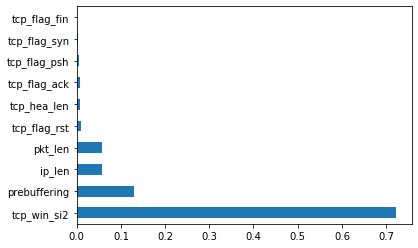

In [5]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

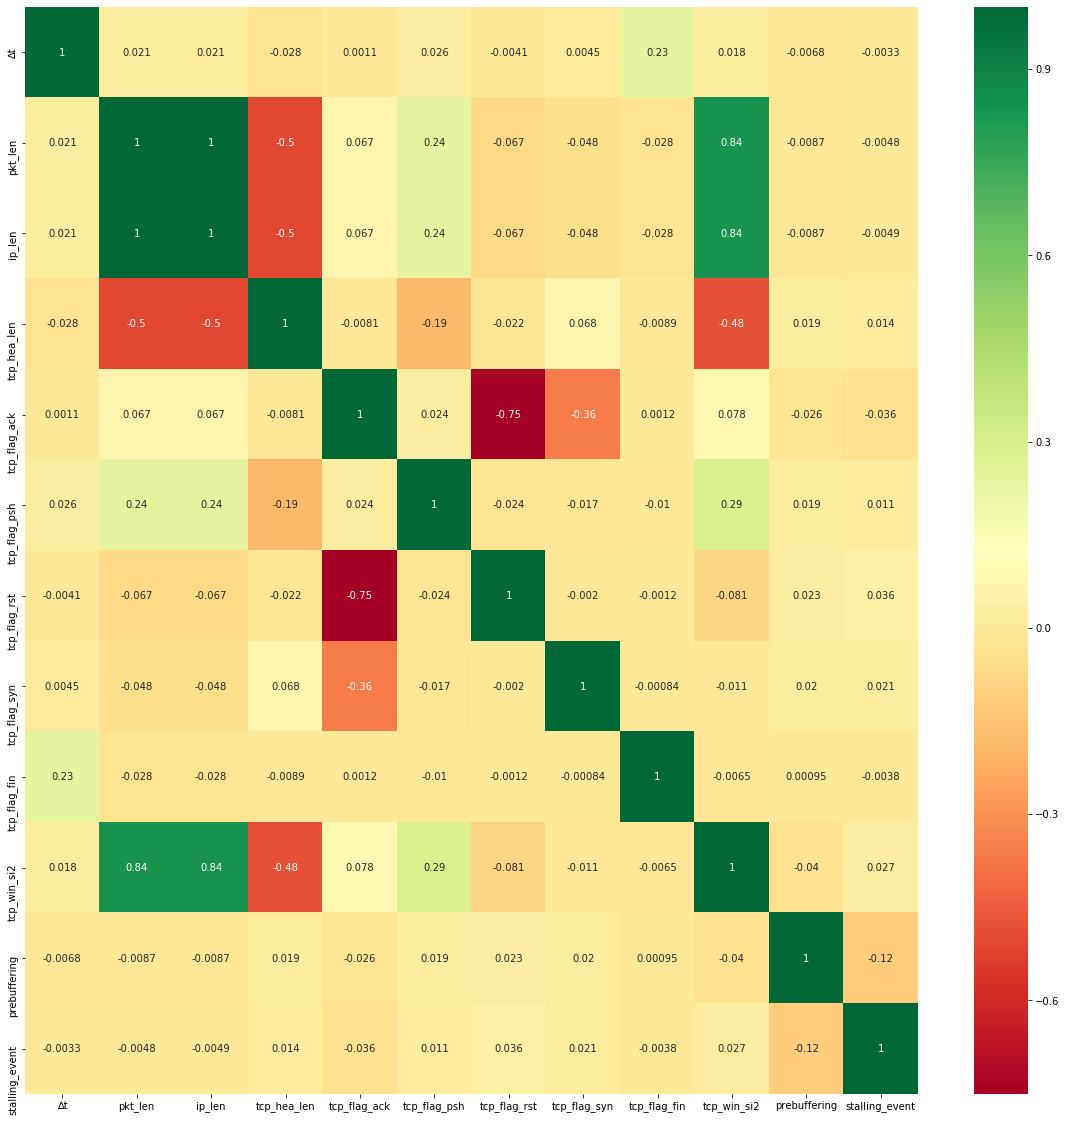

In [6]:
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [7]:
del dataset['ip_len']
del dataset['tcp_flag_psh']
del dataset['tcp_flag_rst']
del dataset['tcp_flag_fin']

print(dataset.columns)






Index(['∆t', 'pkt_len', 'tcp_hea_len', 'tcp_flag_ack', 'tcp_flag_syn',
       'tcp_win_si2', 'prebuffering', 'stalling_event'],
      dtype='object')
